In [2]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns

from pandas_profiling import ProfileReport

In [3]:
df = pd.read_csv('2021nov_rkda.csv', infer_datetime_format=True)
df1 = pd.read_csv('2021nov_rkdbc.csv', infer_datetime_format=True)


In [4]:
rkd_a = pd.merge(df, df1[['Category', 'Heat Index']], on='Category')

In [6]:
rkd_a = rkd_a.drop(['Heat Index_x', 'Series 1'], axis='columns')

In [7]:
rkd_a = rkd_a.dropna(0)

/var/folders/25/1st06df16wj_drlv8cczhqs40000gn/T/ipykernel_51974/1914131134.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  rkd_a = rkd_a.dropna(0)


In [8]:
report_nov = ProfileReport(rkd_a)
report_nov

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
rkd_a.columns

Index(['Category', 'Active Power', 'Operational', 'Hashrate', 'Heat Index_y'], dtype='object')

In [10]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
df = rkd_a

## November data

In [13]:
y = df['Hashrate']
x = df[['Active Power', 'Heat Index_y', 'Operational']]

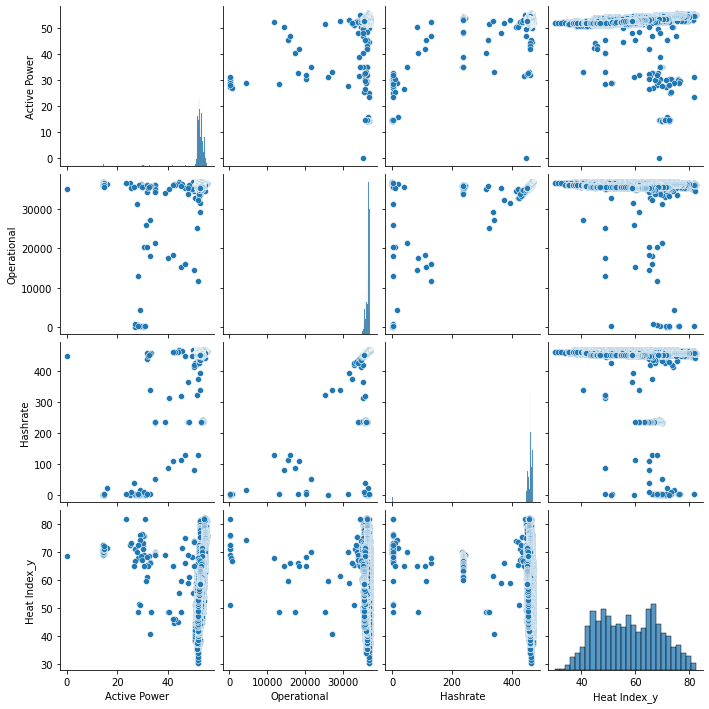

In [14]:
sns.pairplot(df)

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

## Model

In [16]:
LR = linear_model.LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [17]:
y_prediction = LR.predict(x_test)
y_prediction

array([466.22305523, 463.59189513, 458.69886946, ..., 467.49595566,
       451.99193025, 460.33443742])

/Users/hermanoferreira/miniconda3/envs/sr_data/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Hashrate'>

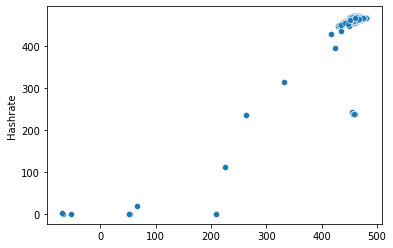

In [18]:
sns.scatterplot(y_prediction, y_test)

# Model validation

In [19]:
score=r2_score(y_test,y_prediction)
print('r2 score is ', score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is  0.6923219990219266
mean_sqrd_error is== 716.9263241400974
root_mean_squared error of is== 26.7754799049447
